In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | eatonton
Processing Record 9 of Set 1 | sanchor
Processing Record 10 of Set 1 | itagiba
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | matiguas
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | ahipara
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | vila velha
Processing Record 19 of Set 1 | boulder
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | port macquarie
P

Processing Record 39 of Set 4 | nikolskoye
Processing Record 40 of Set 4 | jacareacanga
Processing Record 41 of Set 4 | tezu
Processing Record 42 of Set 4 | susuman
Processing Record 43 of Set 4 | coro
Processing Record 44 of Set 4 | uruacu
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | yima
Processing Record 48 of Set 4 | laguna
Processing Record 49 of Set 4 | mehamn
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | wilmington
Processing Record 2 of Set 5 | visnes
Processing Record 3 of Set 5 | ternate
Processing Record 4 of Set 5 | dingle
Processing Record 5 of Set 5 | mwene-ditu
Processing Record 6 of Set 5 | sechenovo
Processing Record 7 of Set 5 | ugoofaaru
Processing Record 8 of Set 5 | dunedin
Processing Record 9 of Set 5 | san cristobal
Processing Record 10 of Set 5 | bilma
Processing Record 11 of Set 5 | quatre cocos
Processing Record 12 of Set 5 | atambua
Pr

Processing Record 32 of Set 8 | jhol
Processing Record 33 of Set 8 | yazman
Processing Record 34 of Set 8 | soyo
Processing Record 35 of Set 8 | apac
Processing Record 36 of Set 8 | tupelo
Processing Record 37 of Set 8 | ashland
Processing Record 38 of Set 8 | broken hill
Processing Record 39 of Set 8 | hare bay
Processing Record 40 of Set 8 | paka
Processing Record 41 of Set 8 | nishihara
Processing Record 42 of Set 8 | lodwar
Processing Record 43 of Set 8 | hammerfest
Processing Record 44 of Set 8 | sarankhola
Processing Record 45 of Set 8 | ambilobe
Processing Record 46 of Set 8 | namatanai
Processing Record 47 of Set 8 | chernyshevskiy
Processing Record 48 of Set 8 | hualmay
Processing Record 49 of Set 8 | weyburn
Processing Record 50 of Set 8 | naryan-mar
Processing Record 1 of Set 9 | kamenskoye
City not found. Skipping...
Processing Record 2 of Set 9 | rehoboth
Processing Record 3 of Set 9 | tucumcari
Processing Record 4 of Set 9 | kununurra
Processing Record 5 of Set 9 | oudtsh

Processing Record 19 of Set 12 | boali
Processing Record 20 of Set 12 | hirara
Processing Record 21 of Set 12 | raudeberg
Processing Record 22 of Set 12 | siyabuswa
Processing Record 23 of Set 12 | kudahuvadhoo
Processing Record 24 of Set 12 | puerto quijarro
Processing Record 25 of Set 12 | lucapa
Processing Record 26 of Set 12 | renukut
Processing Record 27 of Set 12 | nosy varika
Processing Record 28 of Set 12 | amparafaravola
Processing Record 29 of Set 12 | phuket
Processing Record 30 of Set 12 | la palma
Processing Record 31 of Set 12 | labuhan
Processing Record 32 of Set 12 | bani
Processing Record 33 of Set 12 | santa cecilia
Processing Record 34 of Set 12 | ovalle
Processing Record 35 of Set 12 | ulaangom
Processing Record 36 of Set 12 | melton mowbray
Processing Record 37 of Set 12 | duz
City not found. Skipping...
Processing Record 38 of Set 12 | brezovo
Processing Record 39 of Set 12 | bijela
Processing Record 40 of Set 12 | parana
Processing Record 41 of Set 12 | nadym
Pro

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.49,74,100,17.38,PF,2021-04-24 19:34:24
1,Longyearbyen,78.2186,15.6401,24.80,68,75,4.61,SJ,2021-04-24 19:34:24
2,Severo-Kurilsk,50.6789,156.1250,34.70,97,100,5.99,RU,2021-04-24 19:34:25
3,Walvis Bay,-22.9575,14.5053,59.00,88,0,5.75,NA,2021-04-24 19:34:25
4,Albany,42.6001,-73.9662,69.01,16,88,7.65,US,2021-04-24 19:32:13
5,Saint-Philippe,-21.3585,55.7679,77.00,83,75,25.32,RE,2021-04-24 19:34:26
6,Eatonton,33.3268,-83.3885,69.80,83,40,6.91,US,2021-04-24 19:34:27
7,Sanchor,24.7553,71.7722,81.34,29,4,7.78,IN,2021-04-24 19:34:28
8,Itagiba,-14.2836,-39.8428,79.32,69,45,4.09,BR,2021-04-24 19:34:28
9,East London,-33.0153,27.9116,64.40,88,0,5.75,ZA,2021-04-24 19:32:55


In [17]:
# Make sure the columns are in good order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [18]:
# # Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"
# # Export the City_Data into a CSV.
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

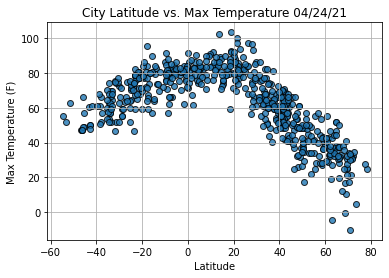

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
# plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

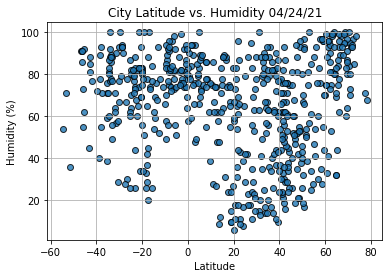

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

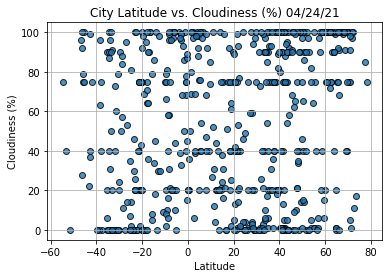

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

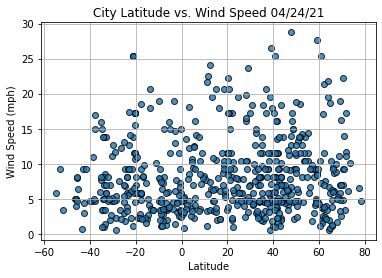

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# # Perform linear regression.
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# # Calculate the regression line "y values" from the slope and intercept.
# regress_values = x_values * slope + intercept

# # Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Create a scatter plot of the x and y values.
# plt.scatter(x_values,y_values)
# # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(x_values,regress_values,"r")
# # Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [ ]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
# # all the information at index 13 of the city_data_df DataFrame
# index13 = city_data_df.loc[13]

In [ ]:
# Northern Hemisphere latitudes, for latitudes greater than or equal to 0
# city_data_df["Lat"] >= 0

In [ ]:
# return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
# city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

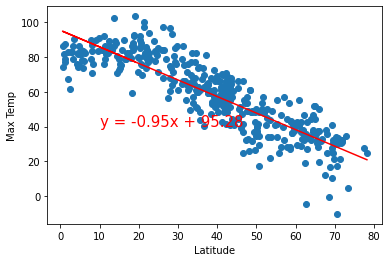

In [27]:
# Linear regression on the Northern Hemisphere temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
# If the equation for the regression line doesn't show up on your graph, you can change the text_coordinates until you see the equation.

In [34]:
# Linear regression on the Southern Hemisphere temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-34-ba8bbfa72c95>, line 6)

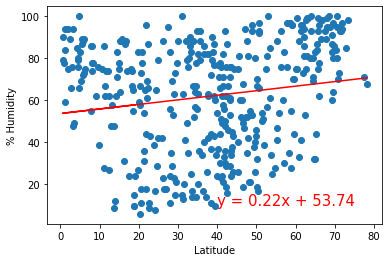

In [35]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

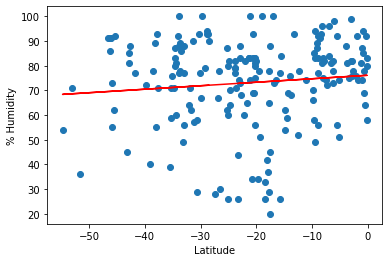

In [36]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

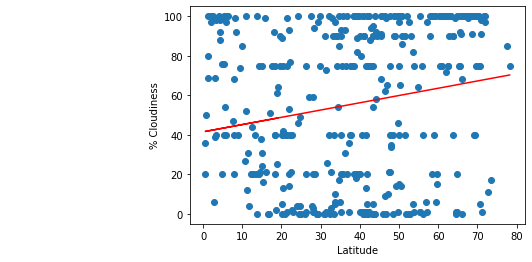

In [37]:
# Linear regression on the Northern Hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

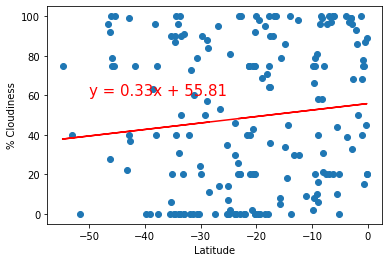

In [38]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

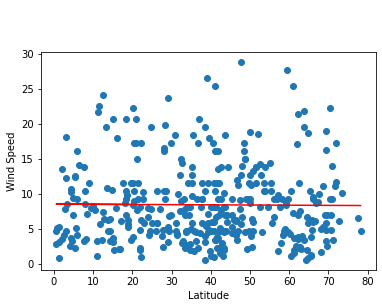

In [39]:
# Linear regression on the Northern Hemisphere wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

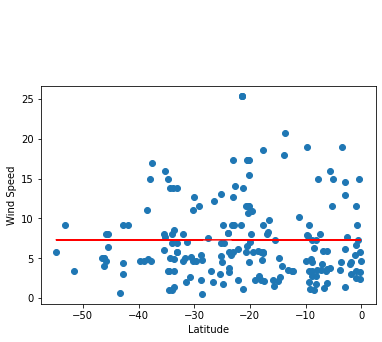

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))